# Matplotlib

In [1]:
%matplotlib inline

In [2]:
import requests
import matplotlib.pyplot as plt

In [3]:
EXAM01_URL = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/exam01.csv'

def load_data(url=EXAM01_URL):
    ''' Loads CSV data from URL '''
    
    # Fetch data from URL
    data_list = []
    response  = requests.get(url)
    
    # For each line, split by commas and convert items into a float
    for row in response.text.splitlines():
        row_data = []
        for datum in row.strip().split(','):
            row_data.append(float(datum))
        data_list.append(row_data)
        
    # Return list of lists
    return data_list

In [31]:
SECTION_MAX = [3, 5, 6, 4, 4, 4, 4]

def plot_sections(data):
    ''' Plot section percentages for given data '''
    section_labels  = ['Commands', 'Shell', 'Networking', 'Pipelines', 'Debugging', 'Filters', 'Scripting']
    section_numbers = range(len(section_labels))
    section_data    = [[], [], [], [], [], [], []]
    
    # Separate scores from each student into section lists and compute percentage
    for row in data:
        for index, section in enumerate(section_data):
            section.append(row[index] * 100.0 / SECTION_MAX[index])
    
    # Compute section averages
    section_averages = []
    for section in section_data:
        section_averages.append(sum(section) / len(section))
        
    # Create bar graph of section averages
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.bar(section_numbers, section_averages, color='rgbcymk')
    plt.xticks(section_numbers, section_labels)
    plt.ylabel('Percentage')
    plt.xlabel('Section')

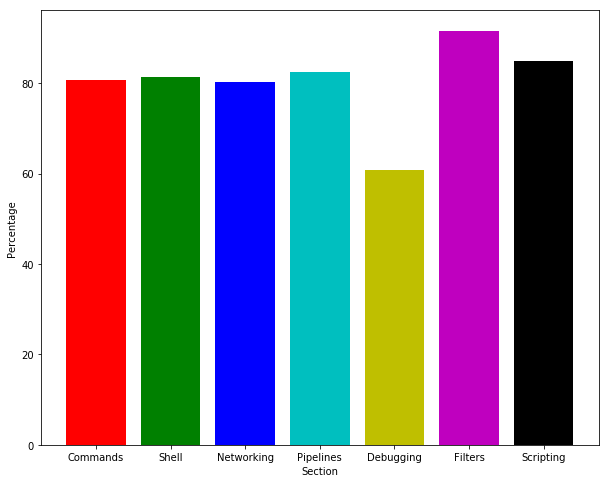

In [32]:
plot_sections(load_data())

In [29]:
def plot_scores(data, score_max=30):
    ''' Plot histograph of scores data '''
    
    # Compute score percentage
    scores = []
    for row in data:
        scores.append(sum(row) * 100.0 / score_max)

    # Construct histogram of scores
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    ax.hist(scores, bins=range(30, 110, 10), color='g')
    plt.grid(True)
    plt.ylabel('Number of Students')
    plt.xlabel('Percentage')

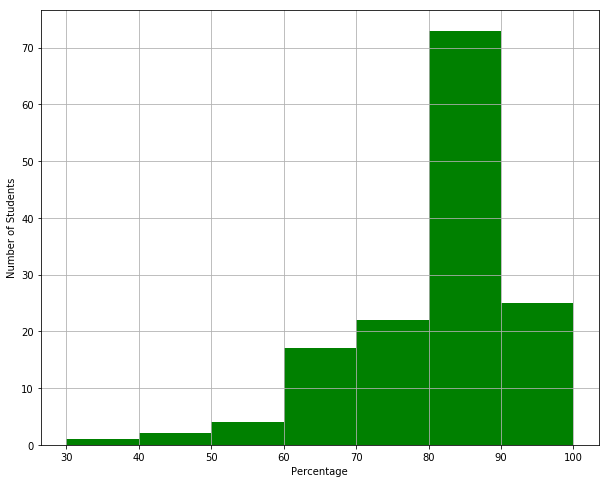

In [30]:
plot_scores(load_data())

# Requests, JSON, HTML, Interact

In [21]:
import requests

from IPython.display import HTML
from ipywidgets import interact

In [33]:
WIKIPEDIA_URL = 'http://en.wikipedia.org/w/api.php'

def wikipedia(query, limit=5, orderby='ns'):
    ''' Display HTML search results of Wikipedia query 
    
    - `limit`: specifies maximum number of results to display
    - `orderby`: specifies how to order the results (ie. which field)
    '''
    
    # If query is empty, do nothing
    if not query:
        return
    
    # Request Wikipedia search results
    params   = {'action': 'query', 'list': 'search', 'format': 'json', 'srsearch': query}
    response = requests.get(WIKIPEDIA_URL, params=params)
    
    # Check that search request was successful
    if response.status_code != 200:
        display(HTML('Unable to retrieve search for {}: {}'.format(query, response.text)))
        return
        
    # Sort list of results by orderby key and restrict results to specified limit
    # For each article in list, add to HTML table string
    data = response.json()
    html = '<table><tbody>'
    for index, article in enumerate(sorted(data['query']['search'], key=lambda a: a[orderby])[:limit]):
        html += '''
        <tr>
            <td>{}</td>
            <td style="text-align: left"><a href="http://en.wikipedia.org/wiki/{}" target="_blank">{}</a></td>
            <td style="text-align: left"><i>{}</i></td>
        </tr>
        '''.format(index + 1, article['title'], article['title'], article['snippet'])
        
    html += '</tbody></table>'
    
    # Display final HTML string
    display(HTML(html))

In [34]:
wikipedia('deadpool')

In [35]:
ORDERBY = {
    'Index'    : 'ns',
    'PageID'   : 'pageid',
    'Title'    : 'title',
    'Timestamp': 'timestamp',
}

interact(wikipedia, query='', limit=(1, 10), orderby=ORDERBY)

interactive(children=(Text(value='', description='query'), IntSlider(value=5, description='limit', max=10, min=1), Dropdown(description='orderby', options={'Index': 'ns', 'PageID': 'pageid', 'Title': 'title', 'Timestamp': 'timestamp'}, value='ns'), Output()), _dom_classes=('widget-interact',))

<function __main__.wikipedia>